In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'pubg-weapon-stats.csv')

### Basic EDA

In [42]:
df.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'Fire Mode', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
       'HDMG_2', 'HDMG_3'],
      dtype='object')

In [3]:
df

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.0800,4,2,612.00,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.0100,4,2,490.00,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.0860,4,2,547.00,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.0100,4,2,490.00,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,448.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.0100,4,2,430.00,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,466.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


Observed that the Rate of fire column is erroneous, so recalculated it

In [4]:
df['Rate of Fire'] = df['Damage']/ df['Damage Per Second'] 

In [5]:
df.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,38.000000,44.000000,44.000000,38.000000,36.000000,44.000000,44.000000,44.000000,44.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,6.747632,63.340909,18.431818,403.552632,615.777778,0.400460,3.840909,2.136364,394.102500,68.081081,47.929730,41.02973,30.762162,125.756757,88.024324,75.418919,56.554054
std,3.336421,47.134613,18.421925,297.886492,256.455077,0.693793,1.829261,0.851562,230.785698,57.379254,40.074853,34.22249,25.699852,66.445937,46.555728,39.888009,29.872717
min,0.300000,18.000000,1.000000,25.000000,250.000000,0.047970,1.000000,1.000000,28.000000,22.400000,15.700000,13.40000,10.100000,44.900000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,5.000000,52.500000,350.000000,0.085657,3.000000,2.000000,199.377500,41.000000,30.100000,25.80000,19.300000,96.300000,67.400000,57.800000,43.300000
50%,7.620000,48.500000,12.500000,400.000000,715.000000,0.100000,4.000000,2.000000,463.000000,47.000000,33.800000,28.90000,21.700000,109.600000,76.700000,65.700000,49.300000
75%,9.000000,60.250000,30.000000,600.000000,859.750000,0.345447,4.250000,2.250000,509.000000,60.900000,42.600000,36.50000,27.400000,136.300000,95.400000,81.700000,61.300000
max,12.000000,216.000000,100.000000,900.000000,990.000000,3.785714,10.000000,4.000000,1080.000000,282.600000,198.000000,169.20000,126.900000,312.300000,218.700000,187.200000,140.400000


In [6]:
df.isnull().any()

Weapon Name              False
Weapon Type              False
Bullet Type               True
Damage                   False
Magazine Capacity        False
Range                     True
Bullet Speed              True
Rate of Fire             False
Shots to Kill (Chest)    False
Shots to Kill (Head)     False
Damage Per Second        False
Fire Mode                False
BDMG_0                    True
BDMG_1                    True
BDMG_2                    True
BDMG_3                    True
HDMG_0                    True
HDMG_1                    True
HDMG_2                    True
HDMG_3                    True
dtype: bool

#### Null values are related to melee weapons like crossbow,pan,sickle..etc. so dropping them is best

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(35, 20)

#### Availability of weapons by type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


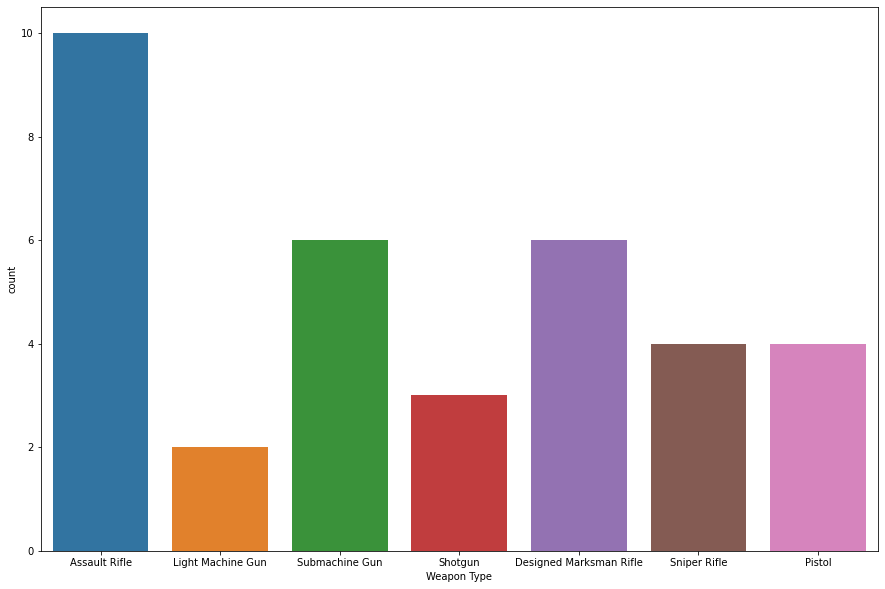

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(df['Weapon Type'])
plt.show()

#### There appear to be much more Assault rifles in the game

#### Availability of weapons by bullet type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


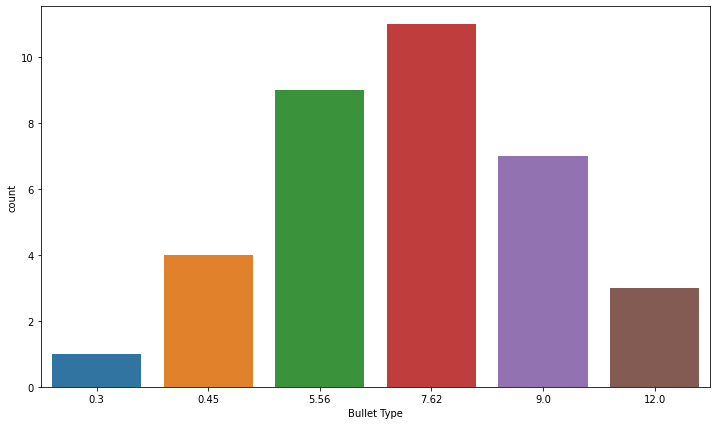

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(df['Bullet Type'])
plt.show()

#### A very high number of guns either hold 7.62mm or 5.56mm ammo 

#### Guns by Magazine Capacity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


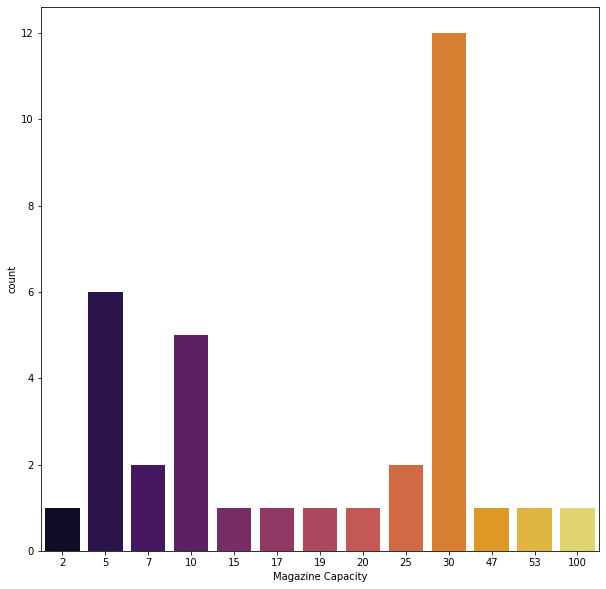

In [11]:
## magaizne capacity
plt.figure(figsize = (10,10))
sns.countplot (df['Magazine Capacity'], palette="inferno")
plt.show()

#### Magazine capacity plays an important role in close range encounters. Weapon having higher magazine capacity can allow taking down multiple enemies quickly. It appears that most guns have a magazine capacity of 30

### Now lets see damage of each weapon type

In [90]:
dum=df.groupby('Weapon Type')['Damage'].mean().reset_index()
dum.head()

,Weapon Type,Damage
0,Assault Rifle,45.200000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
3,Pistol,38.500000
4,Shotgun,210.000000


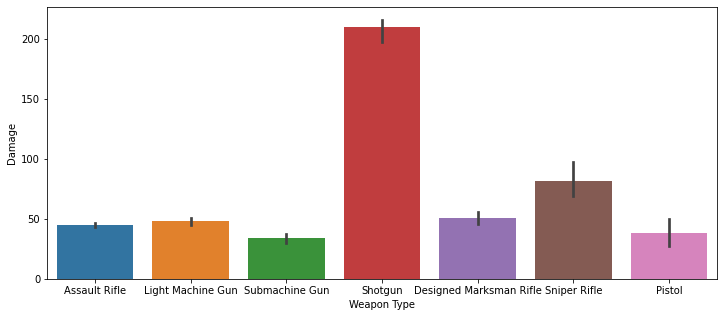

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(y=df['Damage'],x=df['Weapon Type'],data=dum)

#### We can clearly see that the shotguns have highest damage among all guns

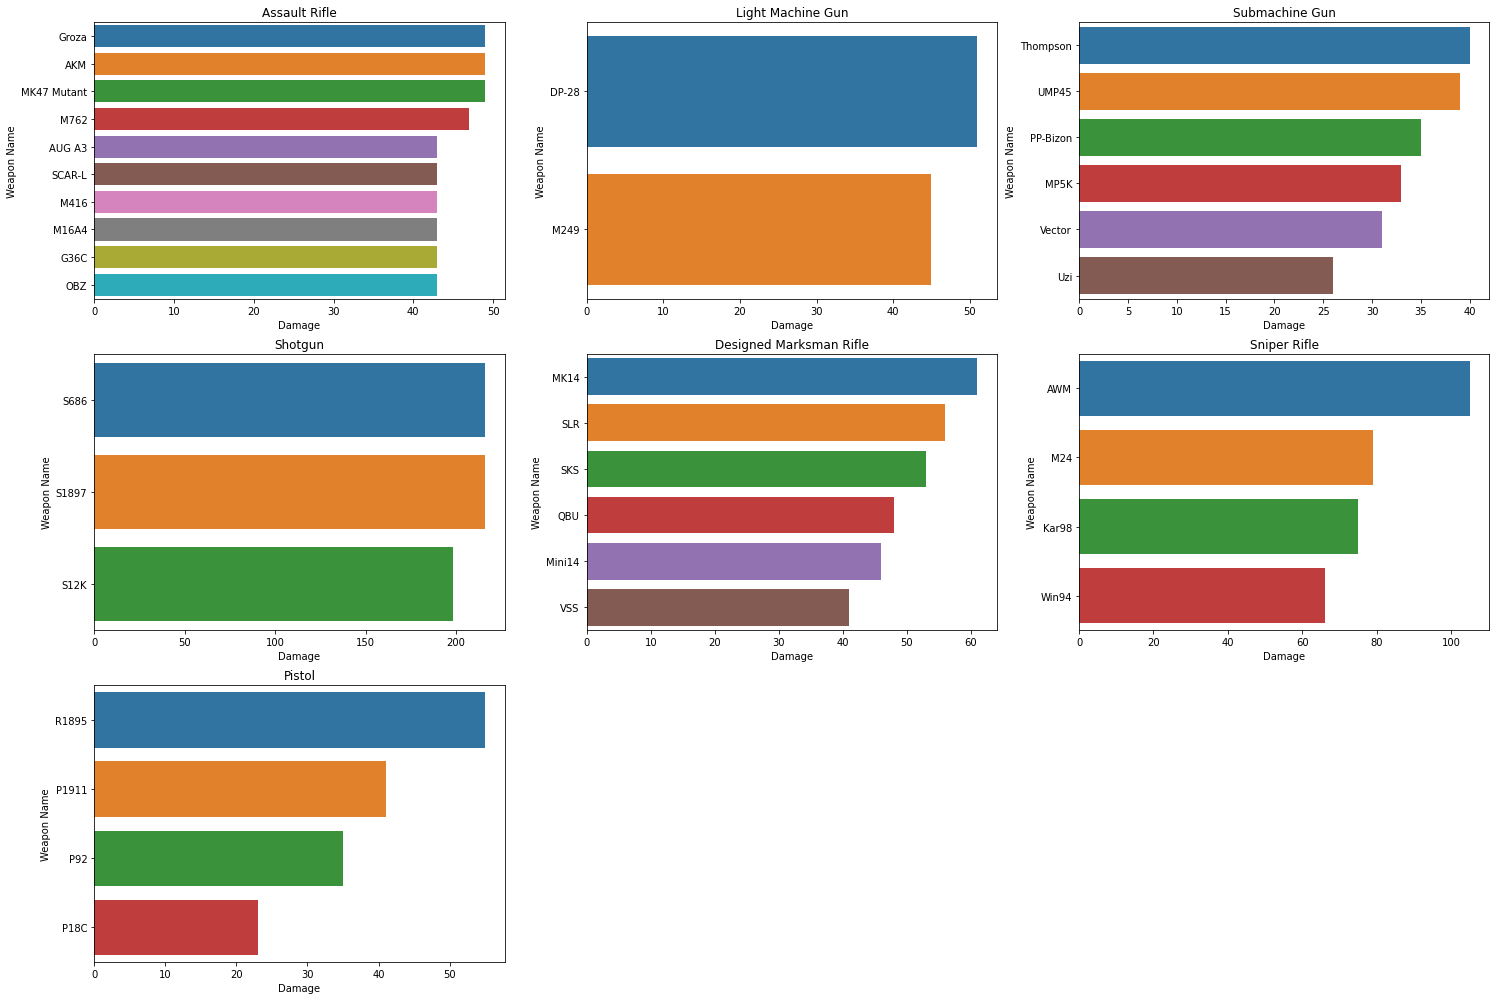

In [60]:
plt.figure(figsize=(25,15))
for i,wt in enumerate(df['Weapon Type'].unique()):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Damage", "Weapon Name"]].sort_values("Damage", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Damage'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

#### Here, we observe that 
1. Among assault rifles, weapons of ammo type 5.56 have same damage which is less than that of those with 7.76 ammo type
2. Among snipers, AWM has the most damage
3. It is clear that among assault rifles, Groza, AKM, MK47 Mutant are the best in terms of damage

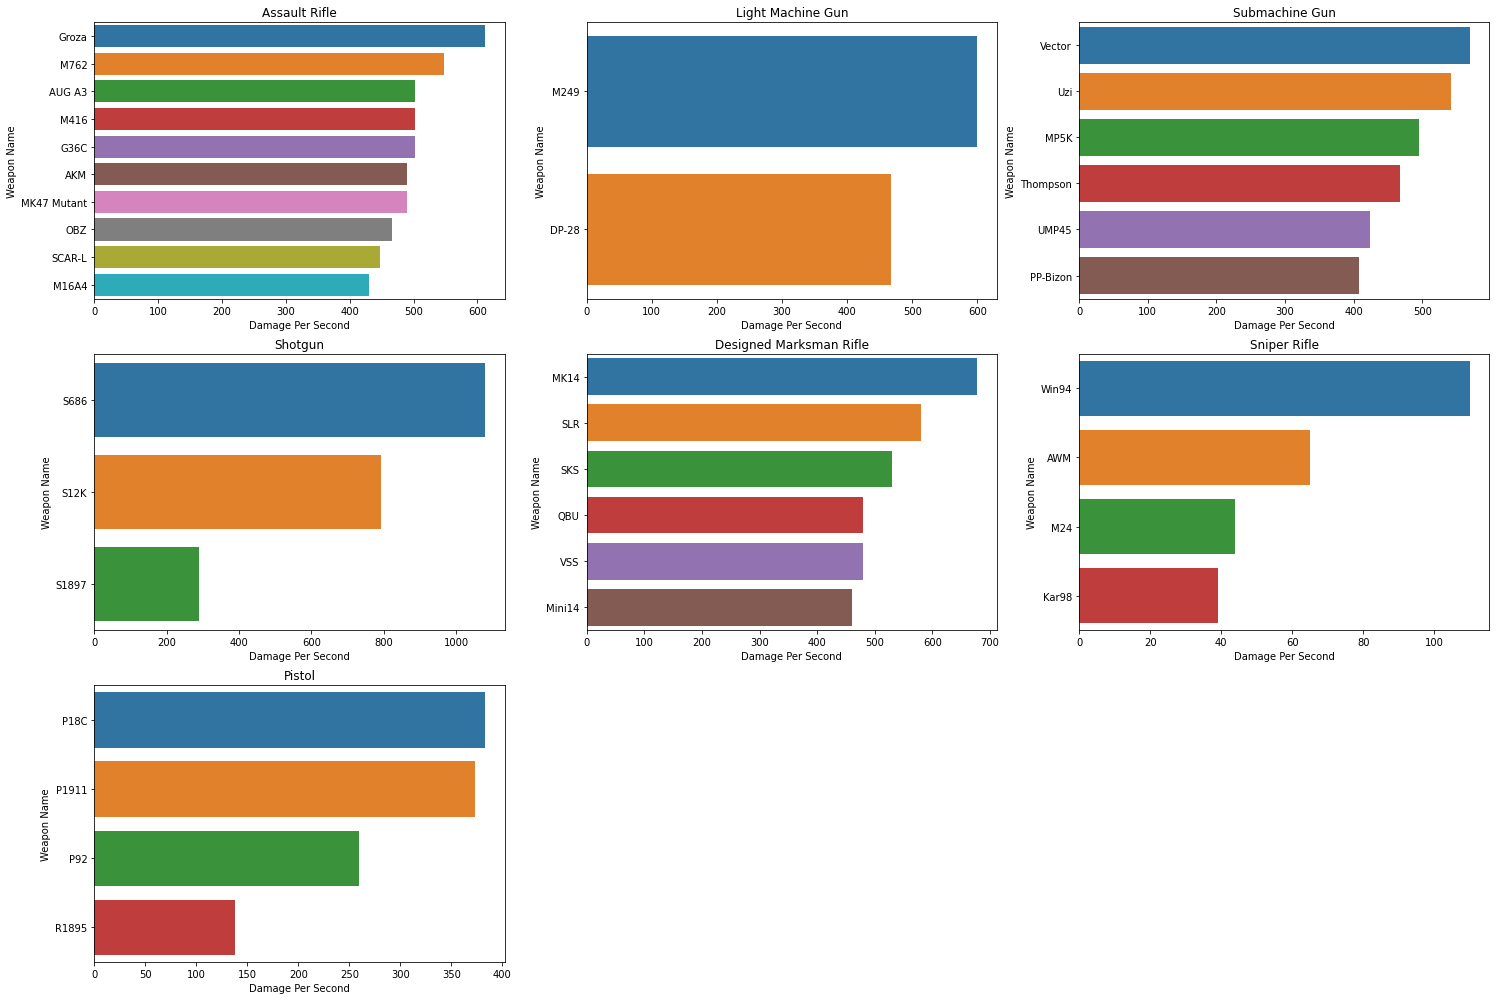

In [93]:
plt.figure(figsize=(25,15))
for i,wt in enumerate(df['Weapon Type'].unique()):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Damage Per Second", "Weapon Name"]].sort_values("Damage Per Second", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Damage Per Second'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

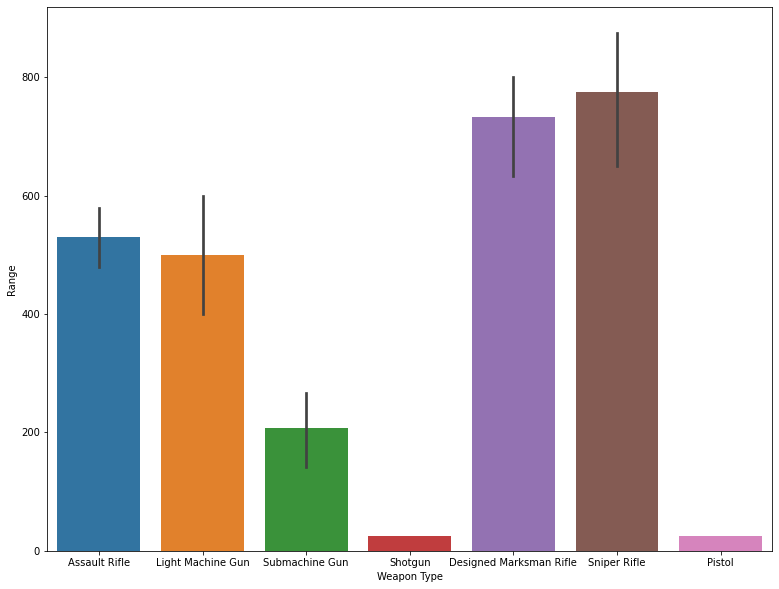

In [61]:
rs=df.groupby('Weapon Type')['Range'].mean().reset_index()
rs.head()
plt.figure(figsize=(13,10))
sns.barplot(x=df['Weapon Type'],y=df['Range'],data=rs)
plt.show()

In [62]:
pd.concat([dum,rs.drop('Weapon Type',axis=1)],axis=1)

,Weapon Type,Damage,Range
0,Assault Rifle,45.200000,530.000000
1,Designed Marksman Rifle,50.833333,733.333333
2,Light Machine Gun,48.000000,500.000000
3,Pistol,38.500000,25.000000
4,Shotgun,210.000000,25.000000
5,Sniper Rifle,81.250000,775.000000
6,Submachine Gun,34.000000,208.333333


#### It is clear that 
1. for long range, sniper rifles are best as they have highest damage for the range. 
2. And assault rifles are better are short to medium ranges
3. And shotguns are best for very close range encounter

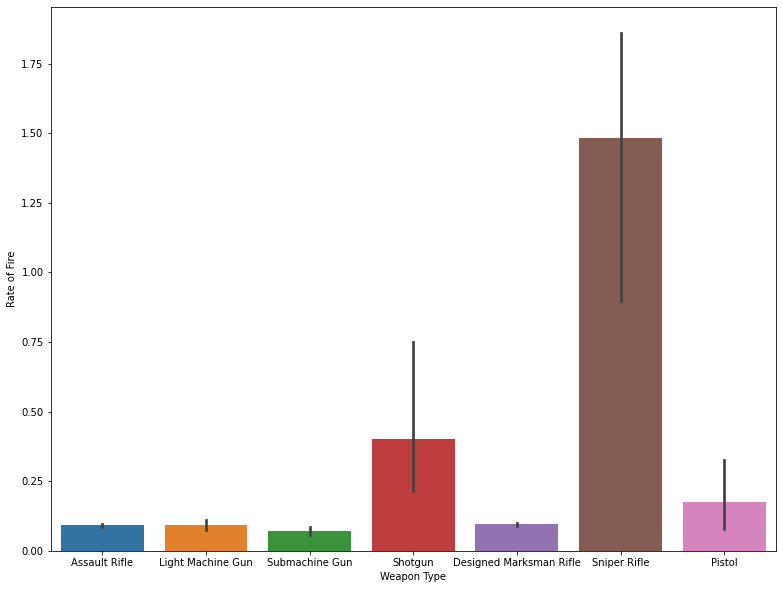

In [91]:
rt = df.groupby('Weapon Type')['Rate of Fire'].mean().reset_index()
## inspecting the rate of fire
plt.figure(figsize=(13,10))
sns.barplot(x=df['Weapon Type'],y=df['Rate of Fire'],data=rt)
plt.show()

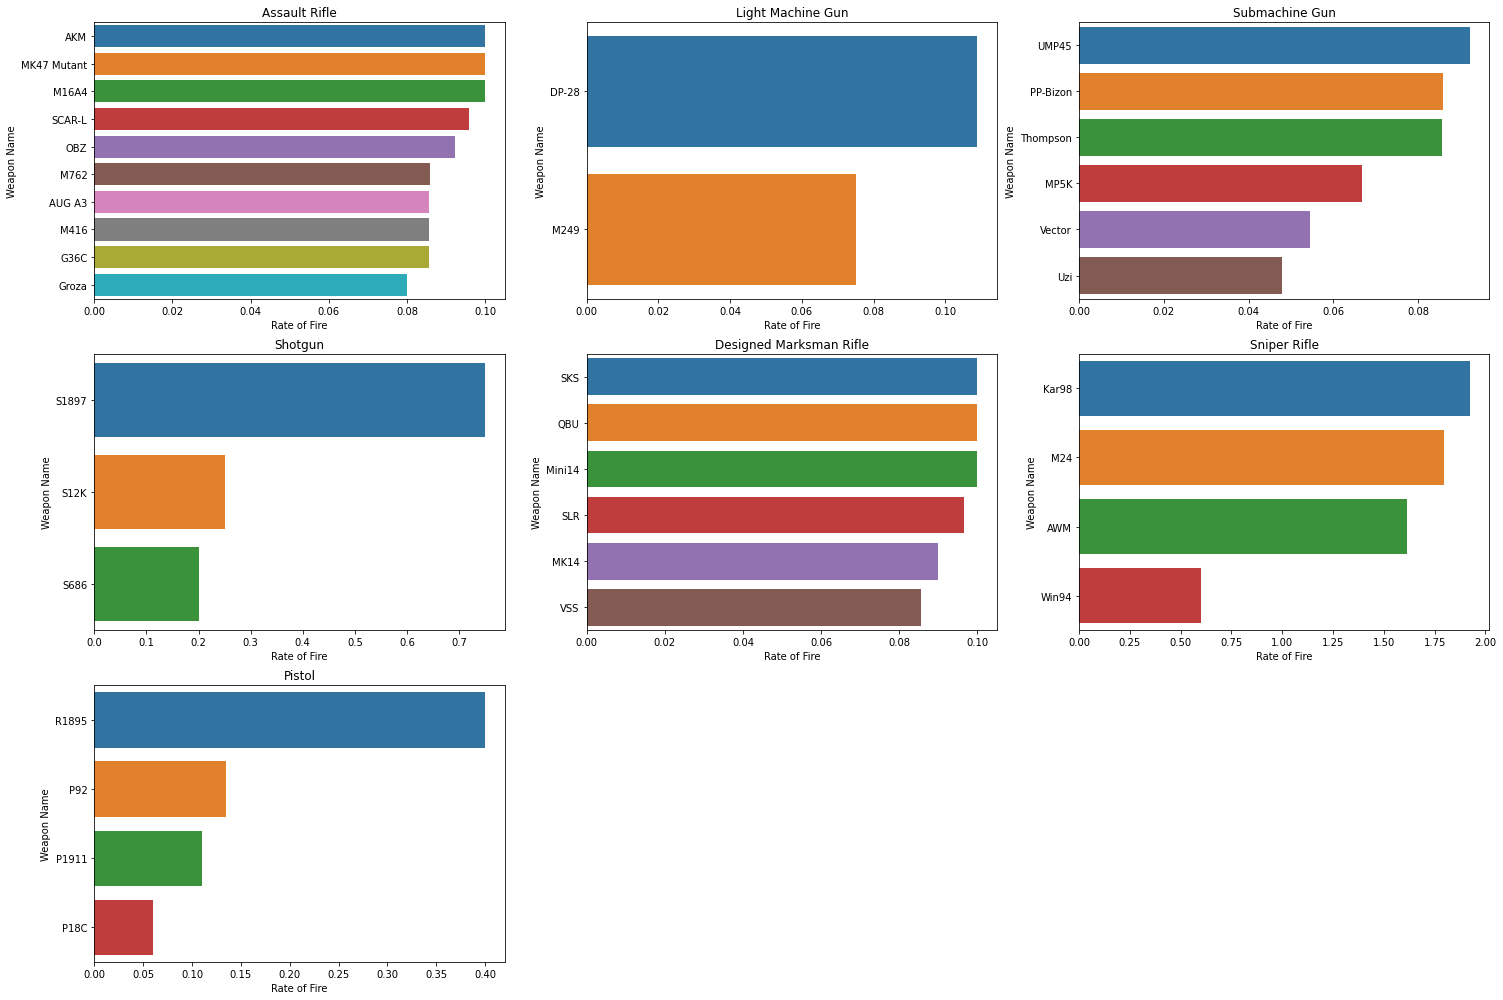

In [94]:
plt.figure(figsize=(25,15))
for i,wt in enumerate(df['Weapon Type'].unique()):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Rate of Fire", "Weapon Name"]].sort_values("Rate of Fire", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Rate of Fire'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

In [63]:
bs=df.groupby('Weapon Type')['Bullet Speed'].mean().reset_index()
bs.head()

,Weapon Type,Bullet Speed
0,Assault Rifle,816.50
1,Designed Marksman Rifle,763.00
2,Light Machine Gun,815.00
3,Pistol,333.75
4,Shotgun,360.00


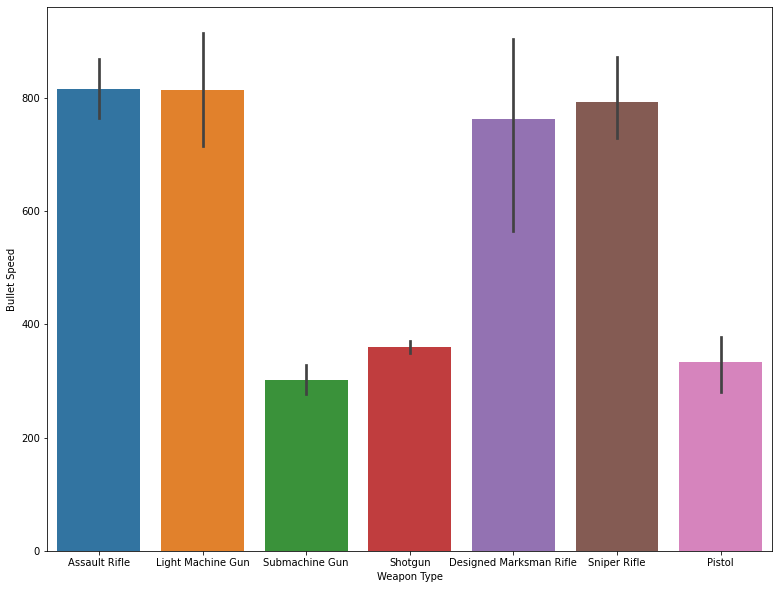

In [64]:
## inspecting the bullet speed
plt.figure(figsize=(13,10))
sns.barplot(x=df['Weapon Type'],y=df['Bullet Speed'],data=bs)
plt.show()

#### Here, assault rifles and machine guns have high bullet speed making them very potent for faster taking down of enemies

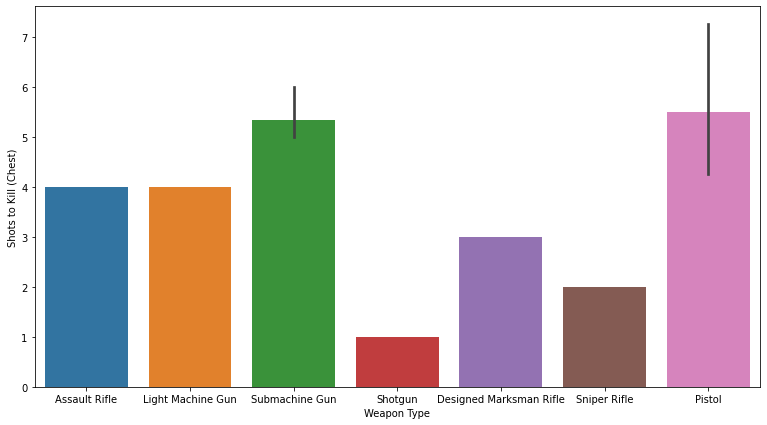

In [65]:
## inspecting shots on chest to kill
plt.figure(figsize=(13,7))
sns.barplot(y=df['Shots to Kill (Chest)'],x=df['Weapon Type'],data=df)
plt.show()

### so in close encounter submachine guns performs well,in case we dont have it use pistol

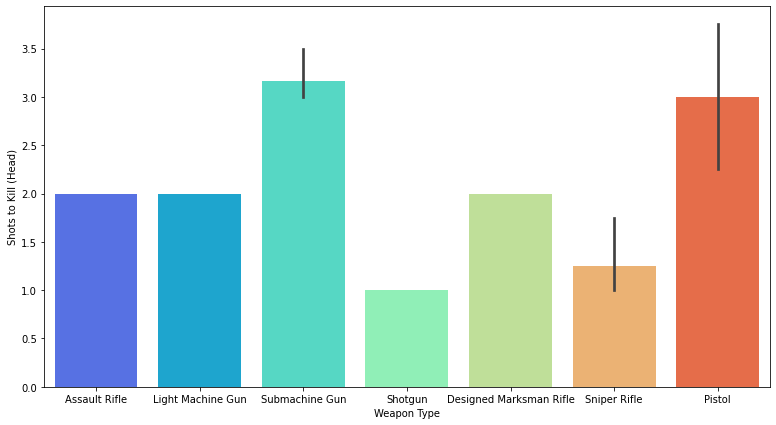

In [66]:
## inspecting shots on head to kill
plt.figure(figsize=(13,7))
sns.barplot(y=df['Shots to Kill (Head)'],x=df['Weapon Type'],data=df,palette="rainbow")
plt.show()

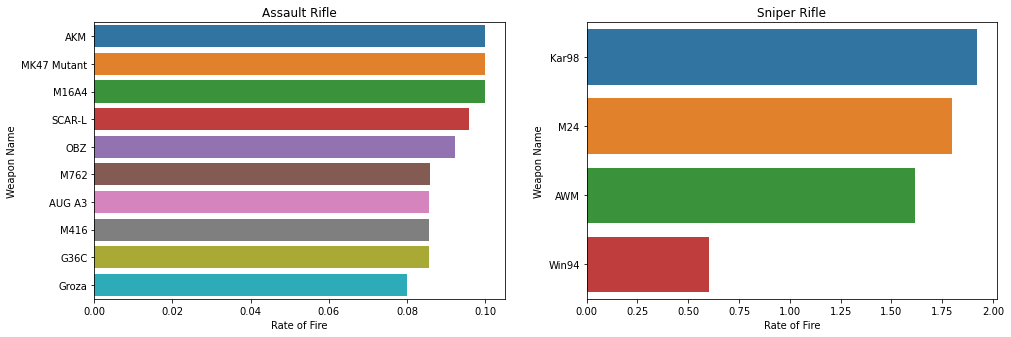

In [95]:
plt.figure(figsize=(25,15))
ll = ['Assault Rifle','Sniper Rifle']
for i,wt in enumerate(ll):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Rate of Fire", "Weapon Name"]].sort_values("Rate of Fire", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Rate of Fire'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

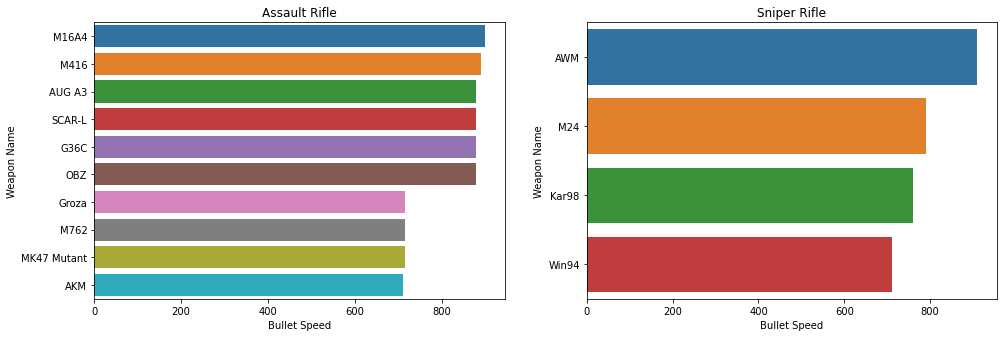

In [96]:
plt.figure(figsize=(25,15))
ll = ['Assault Rifle','Sniper Rifle']
for i,wt in enumerate(ll):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Bullet Speed", "Weapon Name"]].sort_values("Bullet Speed", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Bullet Speed'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

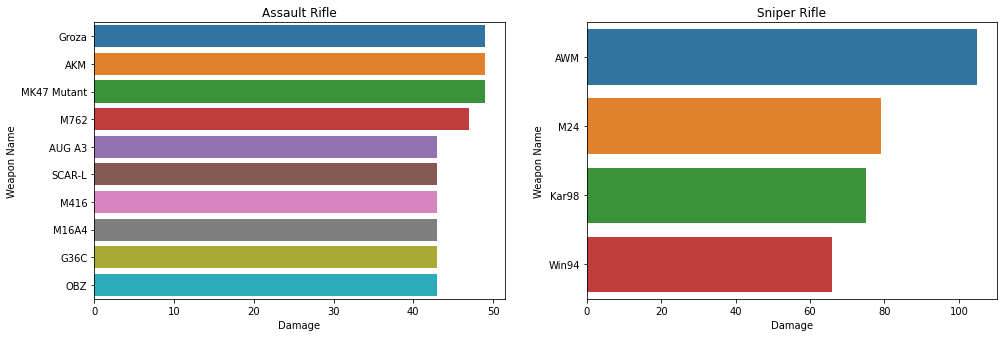

In [97]:
plt.figure(figsize=(25,15))
ll = ['Assault Rifle','Sniper Rifle']
for i,wt in enumerate(ll):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Damage", "Weapon Name"]].sort_values("Damage", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Damage'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

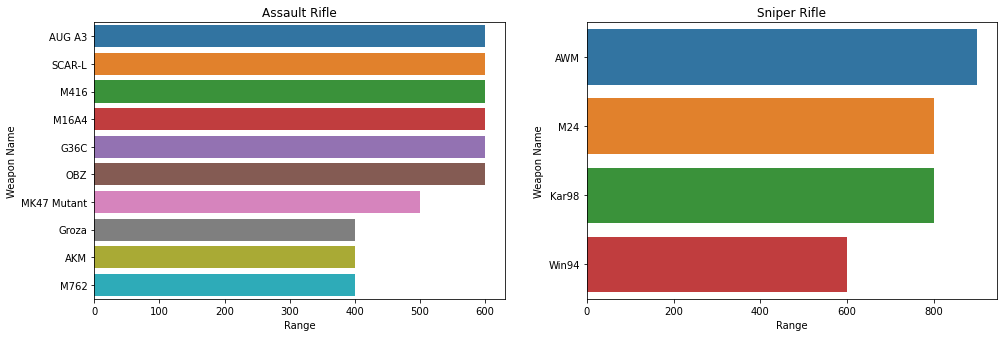

In [98]:
plt.figure(figsize=(25,15))
ll = ['Assault Rifle','Sniper Rifle']
for i,wt in enumerate(ll):
  most_damaging_weapon = df[df["Weapon Type"] == wt][["Range", "Weapon Name"]].sort_values("Range", ascending  = False)
  # plt.figure(figsize=(10,5))
  # print(wt)
  plt.subplot(3,3,i+1)
  sns.barplot(x=most_damaging_weapon['Range'],y=most_damaging_weapon['Weapon Name']).set_title(wt)

plt.subplots_adjust(bottom=0.01)
plt.show()

### Clustering Model

#### Preprocessing

In [67]:
df1 = pd.concat([df,df['Fire Mode'].str.replace(' ','').str.get_dummies(sep=',')], axis = 1)
df1 = df1.drop('Fire Mode',axis = 1)

In [68]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [69]:
df1

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),...,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3,Automatic,Burst,Single
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080065,4,2,...,34.3,29.4,22.0,115.1,80.6,69.0,51.8,1,1,1
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.100000,4,2,...,34.3,29.4,22.0,115.1,80.6,69.0,51.8,1,0,1
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.085923,4,2,...,32.9,28.2,21.1,110.4,77.3,66.2,49.7,1,1,1
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.100000,4,2,...,34.3,29.4,22.0,115.1,80.6,69.0,51.8,0,1,1
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.085657,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.095982,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.085657,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.100000,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,0,1,1
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.085657,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.092275,4,2,...,30.1,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1


In [70]:
df1.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1', 'HDMG_2',
       'HDMG_3', 'Automatic', 'Burst', 'Single'],
      dtype='object')

In [71]:
df1.dtypes

Weapon Name               object
Weapon Type               object
Bullet Type              float64
Damage                     int64
Magazine Capacity          int64
Range                    float64
Bullet Speed             float64
Rate of Fire             float64
Shots to Kill (Chest)      int64
Shots to Kill (Head)       int64
Damage Per Second        float64
BDMG_0                   float64
BDMG_1                   float64
BDMG_2                   float64
BDMG_3                   float64
HDMG_0                   float64
HDMG_1                   float64
HDMG_2                   float64
HDMG_3                   float64
Automatic                  int64
Burst                      int64
Single                     int64
dtype: object

In [72]:
input_columns=['Bullet Type',
       'Magazine Capacity', 'Range', 'Bullet Speed',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1', 'HDMG_2',
       'HDMG_3']

# Converting input to numpy array

X_input = df1[input_columns].to_numpy()

In [73]:
scaler = preprocessing.StandardScaler().fit(X_input)
X_scaled = scaler.transform(X_input)
X_scaled

array([[ 0.29116967,  0.42398461, -0.12278273,  0.36669392,  0.17149859,
        -0.18764666,  0.79554088, -0.33656075, -0.30901654, -0.30867762,
        -0.30993164, -0.12243103, -0.12137154, -0.12291103, -0.12114272],
       [ 0.29116967,  0.42398461, -0.12278273,  0.3469913 ,  0.17149859,
        -0.18764666,  0.19764146, -0.33656075, -0.30901654, -0.30867762,
        -0.30993164, -0.12243103, -0.12137154, -0.12291103, -0.12114272],
       [ 0.29116967,  0.42398461, -0.12278273,  0.36669392,  0.17149859,
        -0.18764666,  0.47698791, -0.35440866, -0.34477896, -0.34458031,
        -0.34577175, -0.19526975, -0.1943841 , -0.19521163, -0.19353288],
       [ 0.29116967,  0.42398461,  0.22802506,  0.36669392,  0.17149859,
        -0.18764666,  0.19764146, -0.30086491, -0.30901654, -0.30867762,
        -0.30993164, -0.12243103, -0.12137154, -0.12291103, -0.12114272],
       [-0.37024599,  0.42398461,  0.57883285,  1.01688041,  0.17149859,
        -0.18764666,  0.25645124, -0.44364826, 

#### Clustering

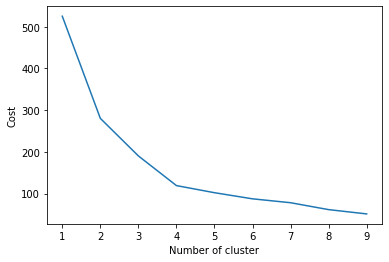

In [75]:
# checking for Elbow methods for best value for 'n', for clustering
wcss = []
n = range(1,10)
for i in n:
    kmeans = KMeans(i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(n,wcss)
plt.xlabel("Number of cluster")
plt.ylabel("Cost")
plt.show()

From graph, the ideal number of clusters seems to be 4, we can also look at the difference in costs with every increase in cluster numbers

In [76]:
wcss_diff = (np.array(wcss[:-1]) - np.array(wcss[1:]))
print(wcss_diff)

[244.84010755  89.98817083  71.14903685  17.05881253  14.66718514
   9.34596971  16.53496086  10.29442922]


Now ideal number of clusters = 4 is confirmed as after that, there is not much decrease in costs

In [77]:
# n = 4 works best as our analysis. 
# we'll traing our model with 4 clusters


kmeans = KMeans(4)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [78]:
predict = kmeans.predict(X_scaled)

In [79]:
# check if output number is same as the number of input
print(len(predict))
print(len(X_input))

35
35


In [80]:
# we'll assign the cluster to Data Frame and use visualization for conclusion
df1['cluster'] = predict
df1

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),...,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3,Automatic,Burst,Single,cluster
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080065,4,2,...,29.4,22.0,115.1,80.6,69.0,51.8,1,1,1,1
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.100000,4,2,...,29.4,22.0,115.1,80.6,69.0,51.8,1,0,1,1
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.085923,4,2,...,28.2,21.1,110.4,77.3,66.2,49.7,1,1,1,1
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.100000,4,2,...,29.4,22.0,115.1,80.6,69.0,51.8,0,1,1,1
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.085657,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1,1
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.095982,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1,1
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.085657,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1,1
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.100000,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,0,1,1,1
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.085657,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1,1
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.092275,4,2,...,25.8,19.3,101.0,70.7,60.6,45.4,1,0,1,1


#### Clustering Results Analysis

In [101]:
print('Weapons types in Cluster 0 :', df1[df1['cluster']==0]['Weapon Type'].unique())
print('Weapons types in Cluster 1 :', df1[df1['cluster']==1]['Weapon Type'].unique())
print('Weapons types in Cluster 2 :', df1[df1['cluster']==2]['Weapon Type'].unique())
print('Weapons types in Cluster 3 :', df1[df1['cluster']==3]['Weapon Type'].unique())

Weapons types in Cluster 0 : ['Submachine Gun' 'Pistol']
Weapons types in Cluster 1 : ['Assault Rifle' 'Light Machine Gun' 'Designed Marksman Rifle']
Weapons types in Cluster 2 : ['Shotgun']
Weapons types in Cluster 3 : ['Sniper Rifle']


In [84]:
label_dct = {0:'SMG',1: 'Rifles', 2:'Shotgun',3:'Sniper Rifle' }

In [85]:
label_dct.values()

dict_values(['SMG', 'Rifles', 'Shotgun', 'Sniper Rifle'])

In [86]:
input_columns

['Bullet Type',
 'Magazine Capacity',
 'Range',
 'Bullet Speed',
 'Shots to Kill (Chest)',
 'Shots to Kill (Head)',
 'Damage Per Second',
 'BDMG_0',
 'BDMG_1',
 'BDMG_2',
 'BDMG_3',
 'HDMG_0',
 'HDMG_1',
 'HDMG_2',
 'HDMG_3']

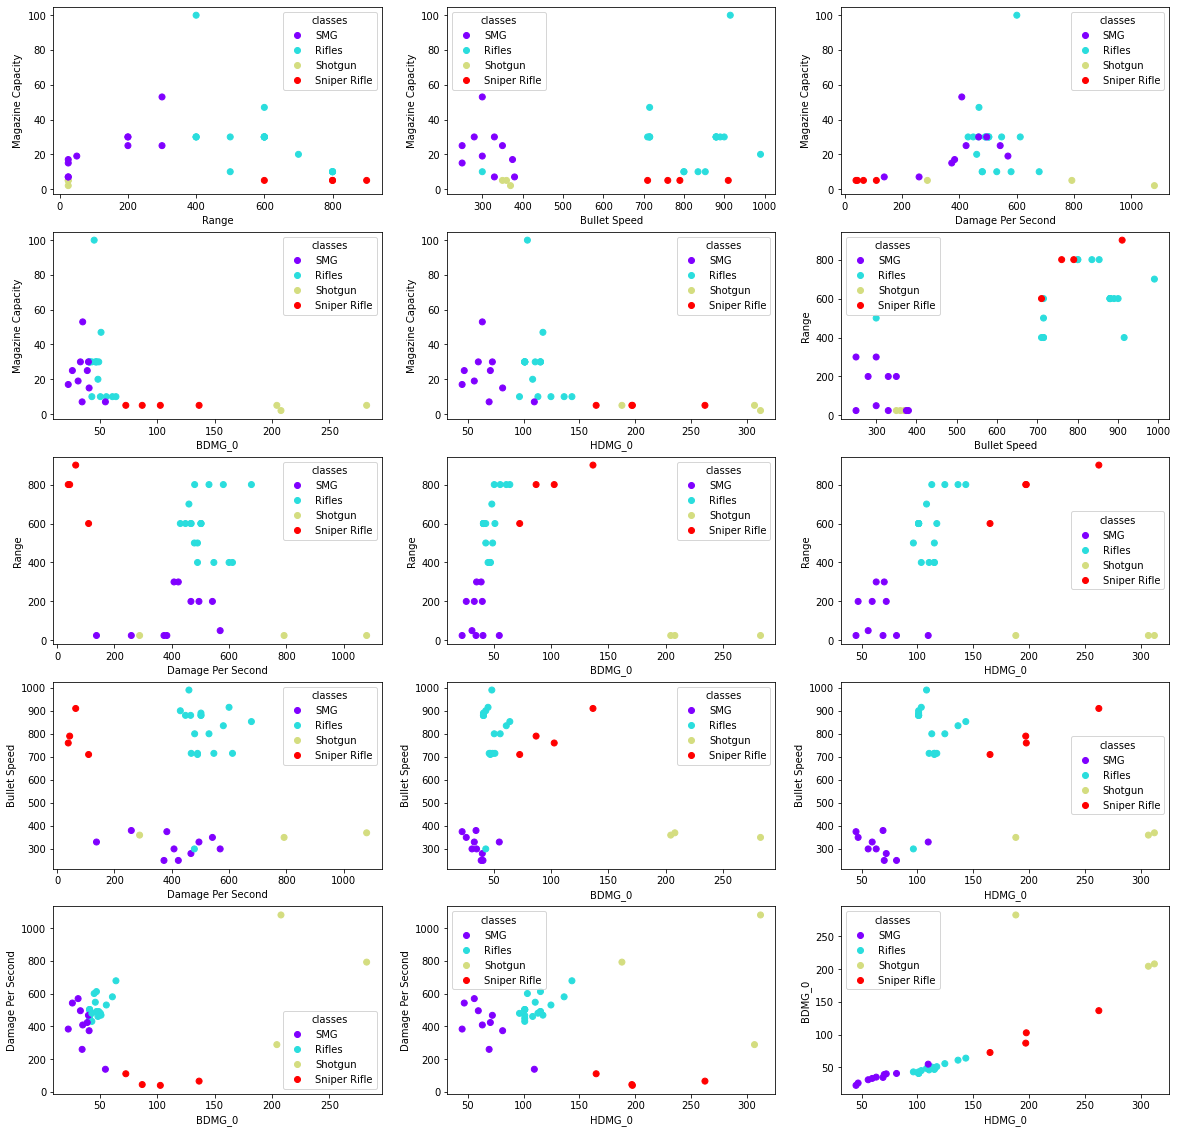

In [87]:
mets = ['Magazine Capacity','Range','Bullet Speed','Damage Per Second','BDMG_0','HDMG_0']

cnt = 0
plt.figure(figsize=(20,20))
for i in range(len(mets)):
    for j in range(len(mets)):
        if i<j:
            cnt = cnt+1
            plt.subplot(5,3,cnt)
                        
            x = df1[mets[j]].to_numpy().astype(float)
            y = df1[mets[i]].to_numpy().astype(float)
            scatter = plt.scatter(x,y, c=df1['cluster'], cmap='rainbow')
            plt.xlabel(mets[j])
            plt.ylabel(mets[i])
            plt.legend(handles=scatter.legend_elements()[0],labels=label_dct.values(), title="classes")

          
plt.show()

In [88]:
df1[df1['cluster']==0]['BDMG_0'].to_numpy()

array([31. , 26. , 35. , 33. , 40. , 39. , 54.8, 40.6, 34.5, 22.4])

In [103]:
df1[df1['cluster']==3]

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),...,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3,Automatic,Burst,Single,cluster
27,AWM,Sniper Rifle,0.30,105,5,900.0,910.0,1.615385,2,1,...,81.8,61.4,262.5,183.7,157.5,118.1,0,0,1,3
28,M24,Sniper Rifle,7.62,79,5,800.0,790.0,1.795455,2,1,...,52.0,39.1,197.0,138.0,118.0,89.0,0,0,1,3
29,Kar98,Sniper Rifle,7.62,75,5,800.0,760.0,1.923077,2,1,...,61.6,46.2,197.5,138.2,118.5,88.8,0,0,1,3
30,Win94,Sniper Rifle,0.45,66,5,600.0,710.0,0.600000,2,2,...,43.5,32.6,165.0,115.4,99.0,74.2,0,0,1,3


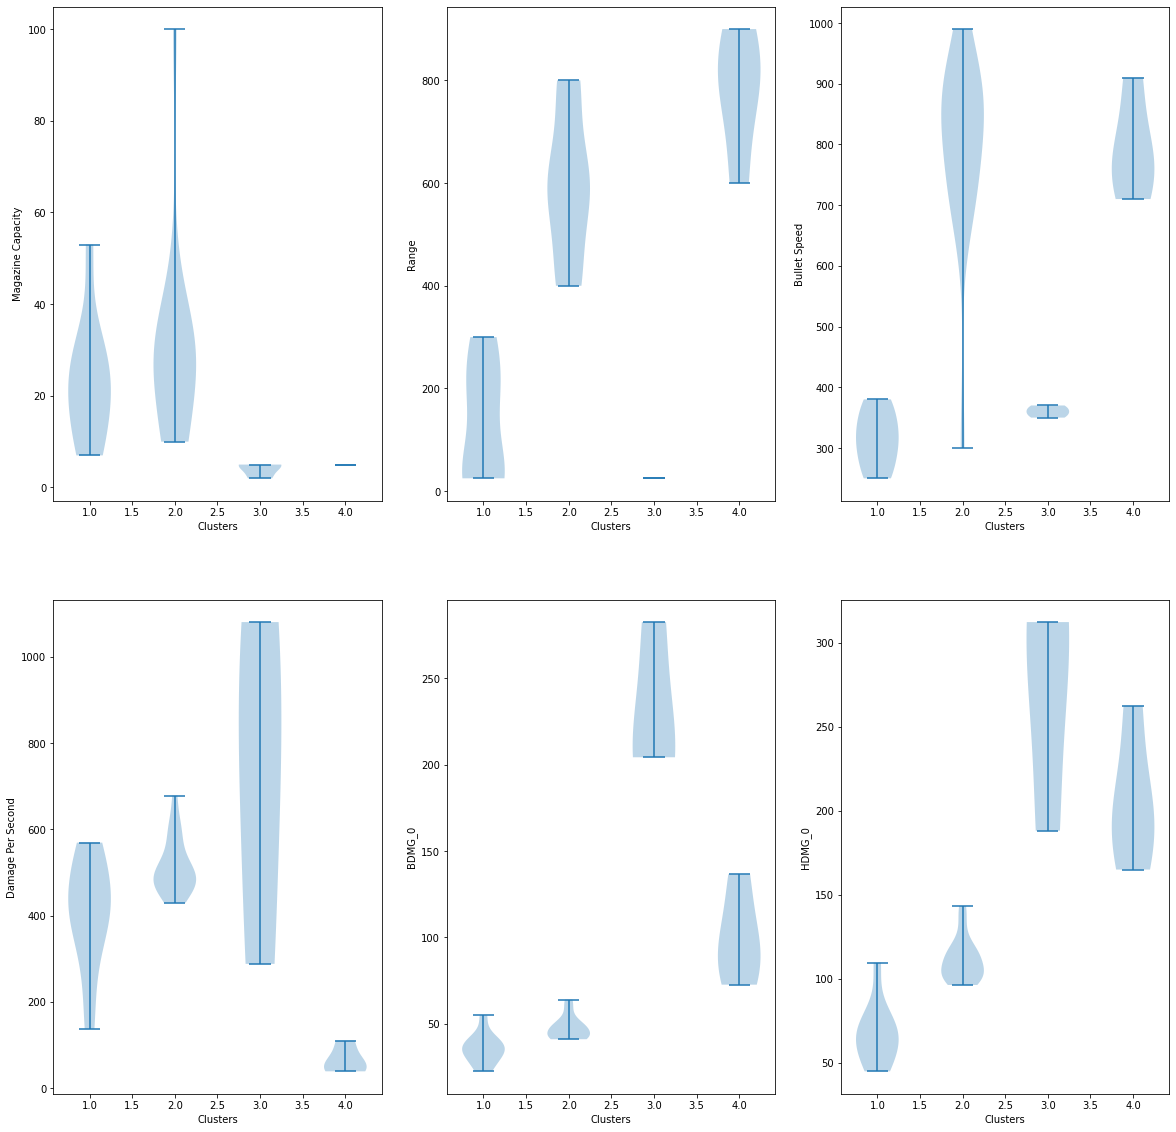

In [102]:
cnt=0
plt.figure(figsize=(20,20))
for i in mets:
    cnt=cnt+1
    plt.subplot(2,3,cnt)
    plt.violinplot(dataset = [
        df1[df1['cluster']==0][i].to_numpy(),
        df1[df1['cluster']==1][i].to_numpy(),
        df1[df1['cluster']==2][i].to_numpy(),
        df1[df1['cluster']==3][i].to_numpy()
    ])
    plt.xlabel('Clusters')
    plt.ylabel(i)
plt.show()

### Conclusion